In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

file_path = r"C:\Users\ollbo\OneDrive\Data_Technician\Project\projectcs\Segment Shopping Customers\Mall_Customers.csv"
df = pd.read_csv(file_path)

In [8]:
#Univariate Anlaysis
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

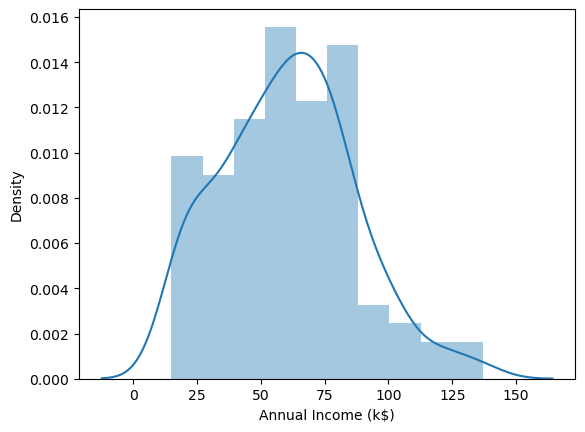

In [40]:
sns.distplot(df['Annual Income (k$)'])

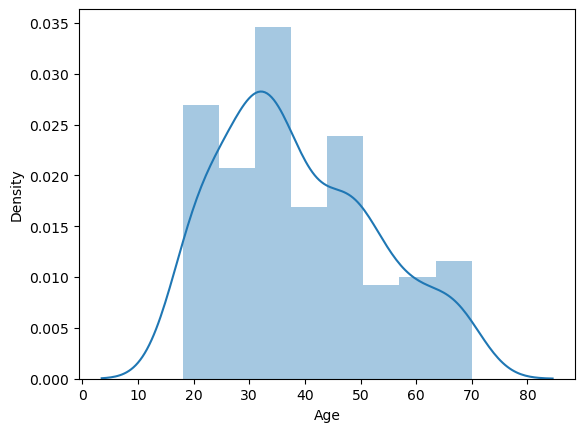

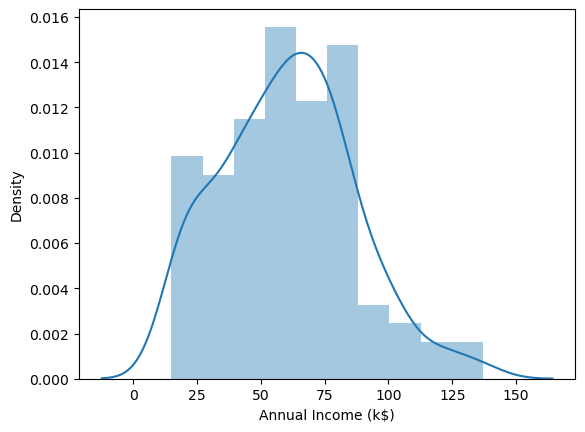

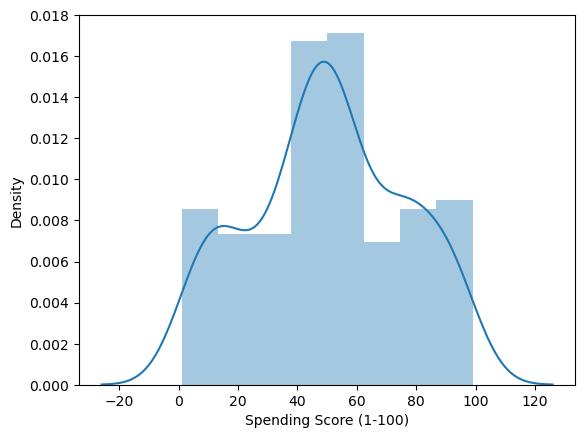

In [30]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

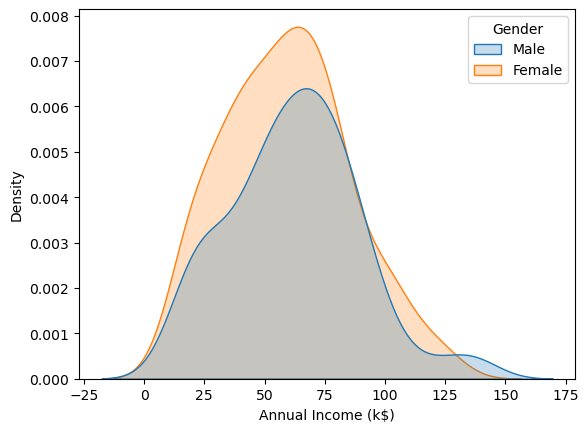

In [34]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', fill=True)

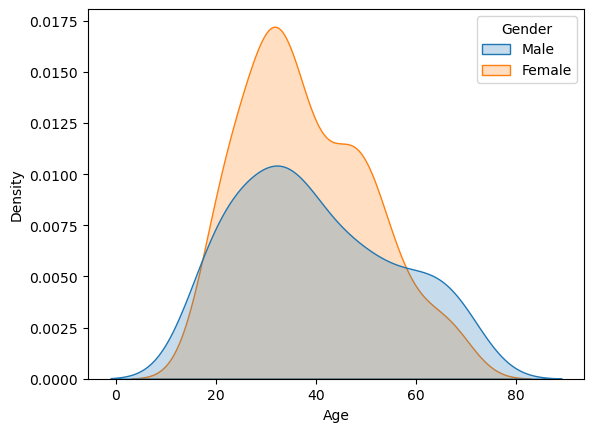

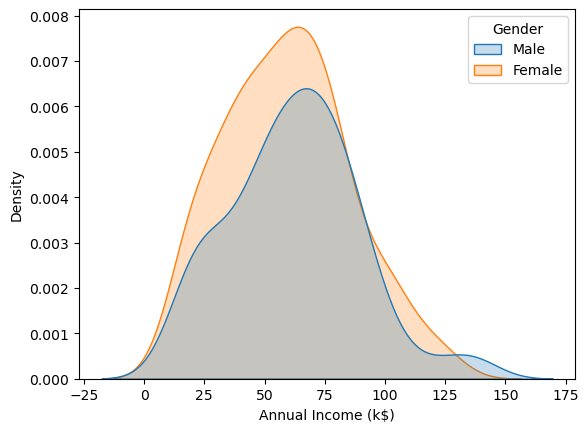

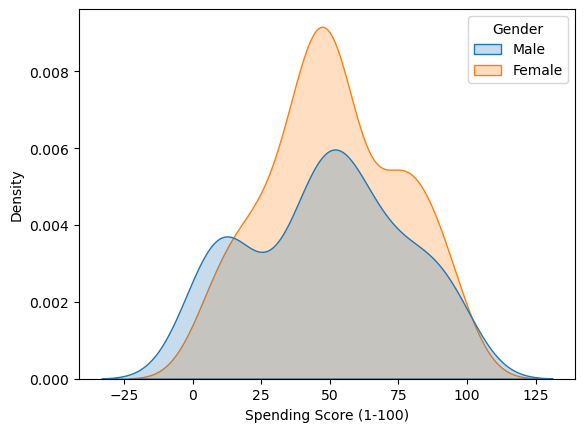

In [36]:
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, hue='Gender', fill=True)

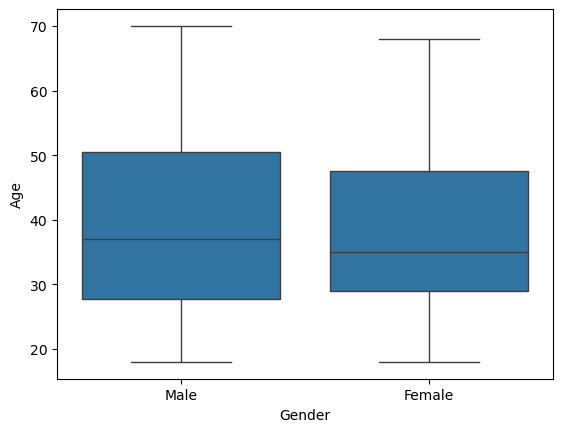

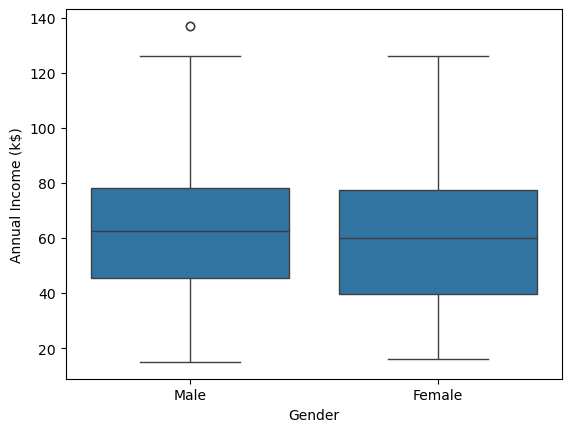

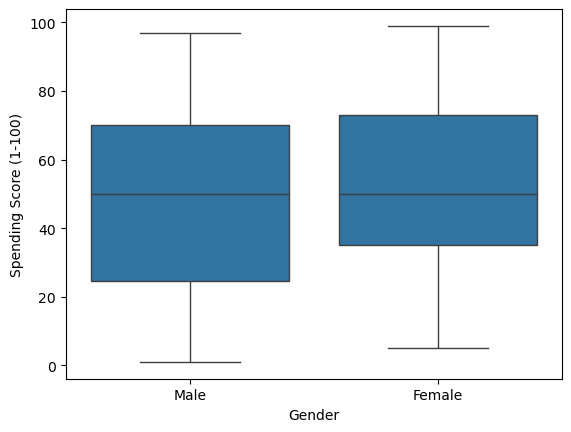

In [38]:
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x = 'Gender' , y = df[i])

In [46]:
df['Gender'].value_counts(normalize = True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [ ]:
#bivariate analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

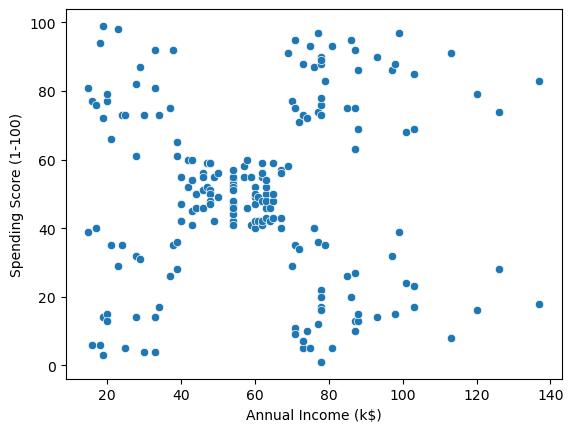

In [48]:
sns.scatterplot(data=df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

In [ ]:
#appears to be 5 or 6 clusters

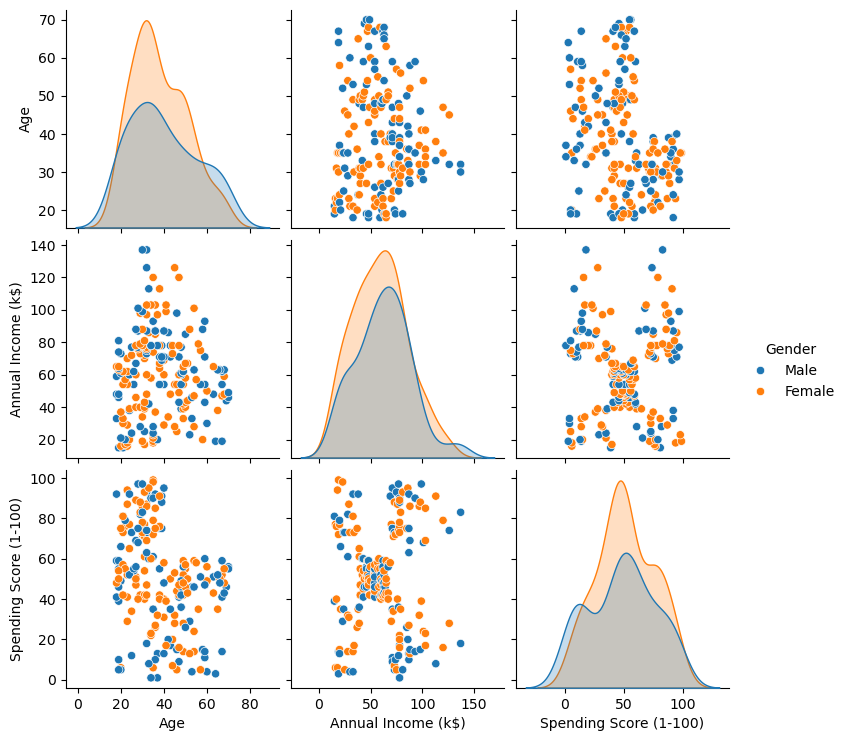

In [58]:
#df = df.drop('CustomerID', axis = 1)
sns.pairplot(df, hue = 'Gender')

In [62]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [66]:
df_corr = df.drop('Gender', axis = 1)
df_corr.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

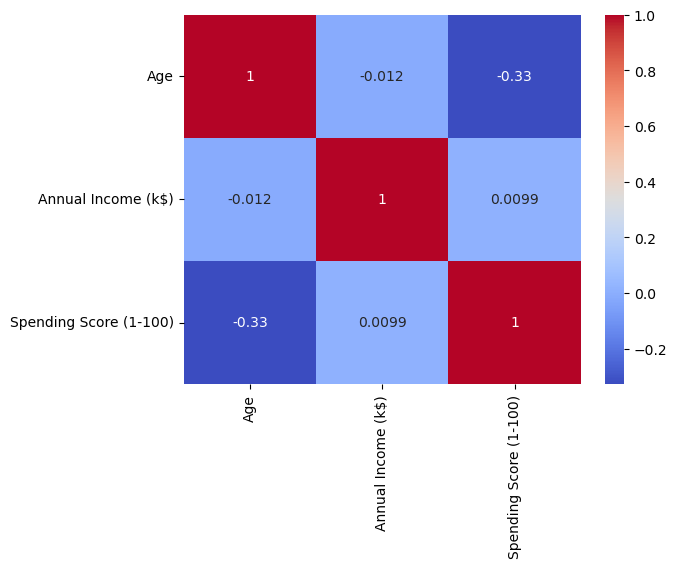

In [68]:
sns.heatmap(df_corr.corr(), annot =  True, cmap = 'coolwarm')

In [ ]:
# univariate, bivariate and multivariate clustering

In [124]:
clustering1 = KMeans(n_clusters = 3)

In [125]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [126]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [127]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [128]:
df['Income Cluster'].value_counts()

Income Cluster
2    92
1    86
0    22
Name: count, dtype: int64

In [129]:
clustering1.inertia_

25341.285871863227

In [167]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [131]:
inertia_scores

[137277.28,
 48968.02080832333,
 23528.152173913044,
 13844.222098218703,
 8481.49619047619,
 5081.48466026727,
 4215.176184926185,
 2831.296031746032,
 2421.661599511599,
 1776.8989843489844]

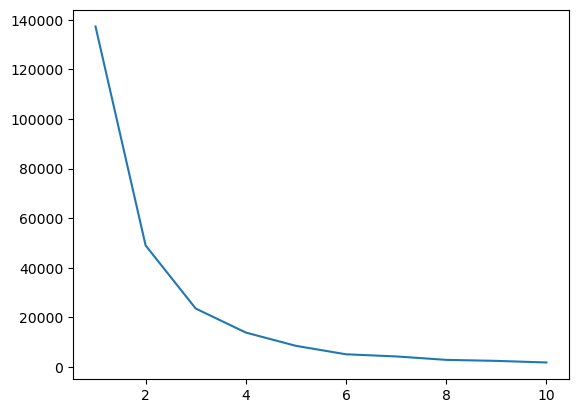

In [132]:
plt.plot(range(1, 11), inertia_scores)
#should use the number of clusters when it starts to elbow

In [155]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.545455,108.181818,52.000000
1,40.023256,36.348837,50.081395
2,38.065217,71.804348,49.880435


In [157]:
#spending scores and age very similar but annual income changes alot with each cluster

In [171]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4


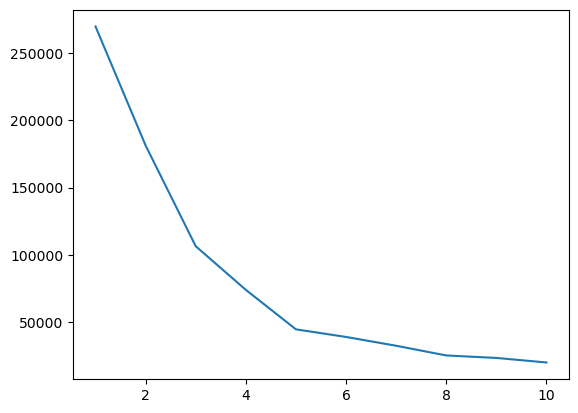

In [172]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1, 11), inertia_scores2)

In [195]:
#5 clusters
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

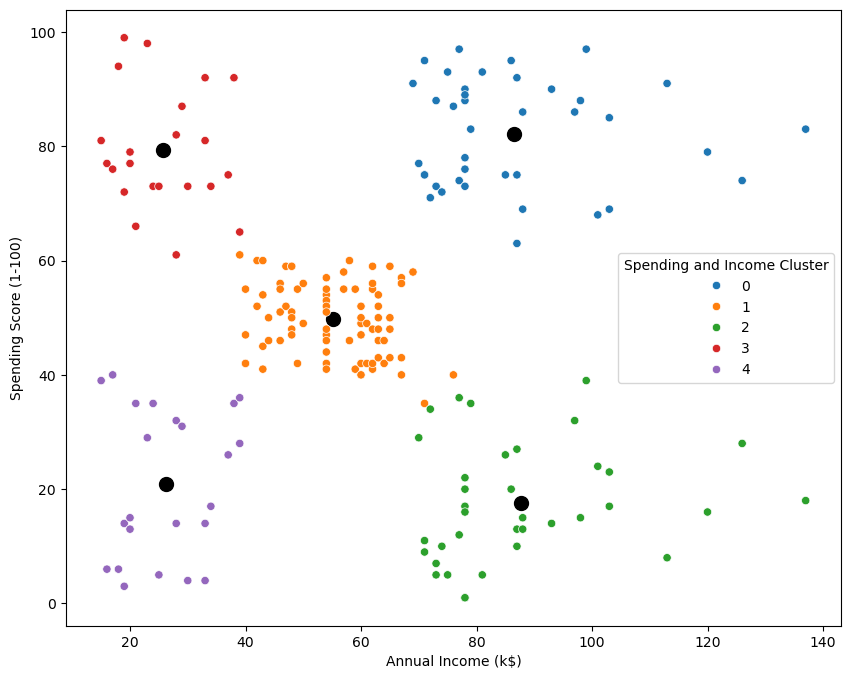

In [197]:
plt.figure(figsize=(10,8))
plt.scatter(x = centers['x'], y = centers['y'], s = 100, c='black')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = 'tab10')

In [ ]:
# good clustering cn be seen visualy so no need to normalise

In [201]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.587500,0.412500
2,0.472222,0.527778
3,0.590909,0.409091
4,0.608696,0.391304


In [203]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,42.937500,55.087500,49.712500
2,40.666667,87.750000,17.583333
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [ ]:
#multivariate cluster